In [138]:
# importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import warnings   
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# ORIGINAL DATA SOURCE:

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [139]:
data_path = 'Projects/Cell_Classification/cell_images'
os.listdir(data_path)

['test', 'train']

In [140]:
test_path = data_path+'/test'
train_path = data_path+'/train'

In [141]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [142]:
os.listdir(train_path)

['parasitized', 'uninfected']

#  VISUALIZING THE DATA:

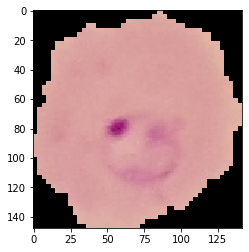

In [143]:
# visualizing parasitized cell
parasitized_cell_path = train_path+'/parasitized/'+os.listdir(train_path+'/parasitized')[0]
parasitized_cell= imread(parasitized_cell_path)
plt.imshow(parasitized_cell)

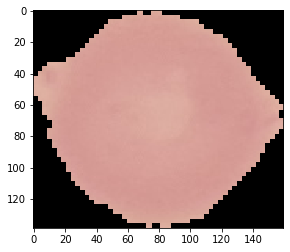

In [144]:
# visualizing the uninfected cell
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [145]:
print('Total Number of Parasitized cells in Train path  :', len(os.listdir(train_path+'\\parasitized')))
print('Total Number of Uninfected cells in Test path   :',len(os.listdir(train_path+'\\uninfected')))

Total Number of Parasitized cells in Train path  : 12480
Total Number of Uninfected cells in Test path   : 12480


In [146]:
unifected_cell.shape

(139, 160, 3)

In [147]:
parasitized_cell.shape

(148, 142, 3)

# DATA AUGMENTATION:

In [148]:
image_shape = (128,128,3)

In [149]:
image_generator = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

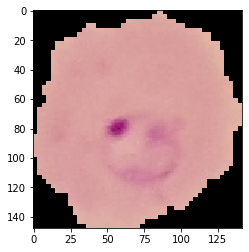

In [150]:
plt.imshow(parasitized_cell)

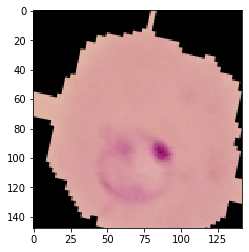

In [151]:
plt.imshow(image_generator.random_transform(parasitized_cell))

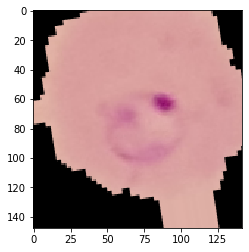

In [152]:
plt.imshow(image_generator.random_transform(parasitized_cell))

In [153]:
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [154]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# BUILDING THE MODEL;

In [155]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [157]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [158]:
batch_size = 16

In [159]:
train_image_genenrator = image_generator.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [160]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


# TRAINING THE MODEL

In [162]:
results = model.fit_generator(train_image_genenrator,epochs=20,
                              validation_data=test_image_generator,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 318s 204ms/step - loss: 0.3991 - acc: 0.7996 - val_loss: 0.1855 - val_acc: 0.9431
Epoch 2/20
1560/1560 [==============================] - 330s 212ms/step - loss: 0.1803 - acc: 0.9435 - val_loss: 0.1657 - val_acc: 0.9415
Epoch 3/20
1560/1560 [==============================] - 328s 211ms/step - loss: 0.1643 - acc: 0.9501 - val_loss: 0.1482 - val_acc: 0.9542
Epoch 4/20
1560/1560 [==============================] - 324s 207ms/step - loss: 0.1565 - acc: 0.9521 - val_loss: 0.1709 - val_acc: 0.9458
Epoch 5/20
1560/1560 [==============================] - 322s 207ms/step - loss: 0.1531 - acc: 0.9536 - val_loss: 0.1495 - val_acc: 0.9515


In [163]:
# saving our model
from tensorflow.keras.models import load_model
model.save('C:/Users/mugesh/Projects/Cell_Classification/malaria_detector.h5')

# EVALUATING THE MODEL:

In [164]:
losses = pd.DataFrame(model.history.history)

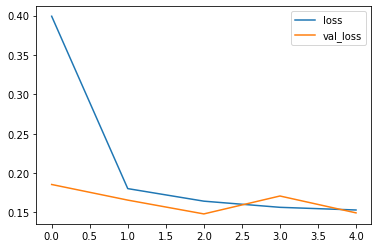

In [165]:
losses[['loss','val_loss']].plot()

In [166]:
model.metrics_names

['loss', 'acc']

In [168]:
model.evaluate_generator(test_image_generator)

[0.1530875958919388, 0.9473077]

In [170]:
pred_probabilities = model.predict_generator(test_image_generator)

In [171]:
pred_probabilities

array([[1.6596913e-04],
       [7.5399876e-06],
       [1.1520386e-03],
       ...,
       [9.7553635e-01],
       [9.8173749e-01],
       [9.8902071e-01]], dtype=float32)

In [173]:
test_image_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [174]:
# if value of pred proability is 0.5 then it is a uninfected cell
predictions = pred_probabilities > 0.5

In [175]:
# Numpy can treat this as True/False
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [177]:
# Actual values of test data
test_image_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [178]:
print(classification_report(test_image_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [179]:
confusion_matrix(test_image_generator.classes,predictions)

array([[1223,   77],
       [  47, 1253]], dtype=int64)

# PREDICTING A CELL IMAGE

In [180]:
parasitized_cell_path

'Projects/Cell_Classification/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [187]:
# loading the image and resizing the image 
cell= image.load_img(unifected_cell_path,target_size=image_shape)

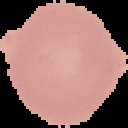

In [188]:
cell

In [189]:
# converting from image to array 
cell = image.img_to_array(cell)
type(cell)

numpy.ndarray

In [190]:
cell = np.expand_dims(cell, axis=0)
cell.shape

(1, 128, 128, 3)

In [191]:
model.predict(cell)

array([[1.]], dtype=float32)

In [192]:
train_image_genenrator.class_indices

{'parasitized': 0, 'uninfected': 1}